# import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [2]:
os.listdir('../data/input/')

['macro.csv', 'sample_submission.csv', 'test.csv', 'train.csv']

# over view

## macro

In [3]:
macro = pd.read_csv('../data/input/macro.csv', parse_dates=['timestamp'])

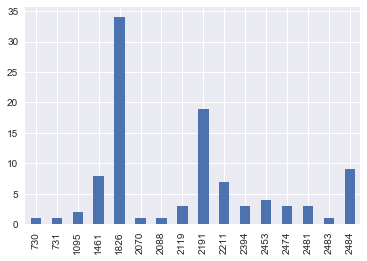

In [4]:
macro_count = macro.count()
macro.count().value_counts().sort_index().plot(kind='bar')

## train & test

In [46]:
train = pd.read_csv('../data/input/train.csv', parse_dates=['timestamp'])
test = pd.read_csv('../data/input/test.csv', parse_dates=['timestamp'])
train_test = pd.concat([train, test])

train['year_month'] = train.timestamp.apply(lambda x: x.year * 100 + x.month)
test['year_month'] = test.timestamp.apply(lambda x: x.year * 100 + x.month)
train_test['year_month'] = train_test.timestamp.apply(lambda x: x.year * 100 + x.month)

train['year'] = train.timestamp.apply(lambda x: x.year)
test['year'] = test.timestamp.apply(lambda x: x.year)
train_test['year'] = train_test.timestamp.apply(lambda x: x.year)

### missing value

feature num = 293


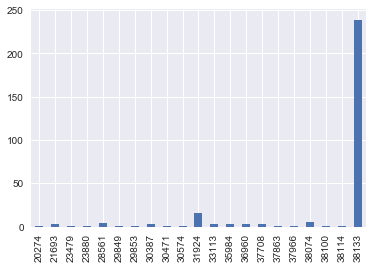

In [6]:
train_test_count = train_test.count()
print("feature num = {}".format(train_test_count.shape[0]))
train_test_count.value_counts().sort_index().plot(kind='bar')

In [7]:
def plot_missing_value(train_test, sort_by='year_month'):
    miss_columns = train_test.columns[train_test.isnull().sum() > 0].tolist()
    print('missing column num = {}'.format(len(miss_columns)))
    miss_train_test = train_test.groupby(sort_by)[miss_columns].agg(lambda x: x.isnull().mean()).T
    plt.figure(figsize=(12,18))
    sns.heatmap(miss_train_test, cbar=False, vmax=1, vmin=0)
    plt.show()

missing column num = 51


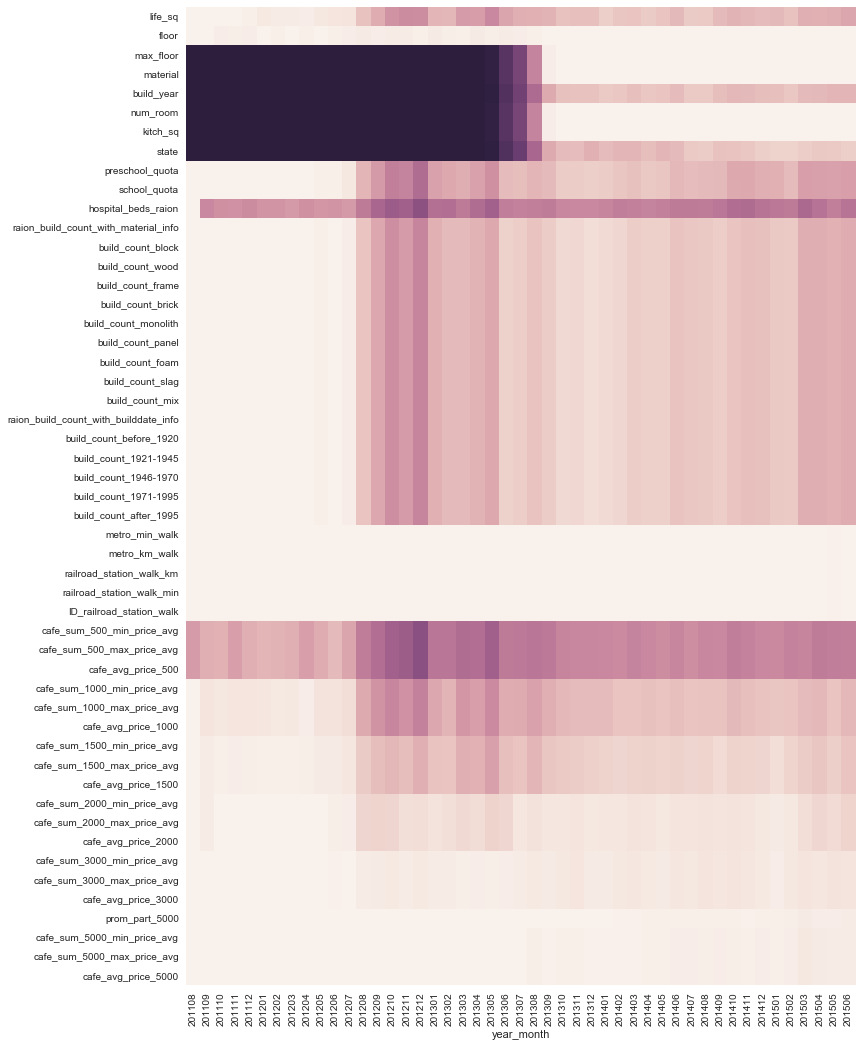

missing column num = 48


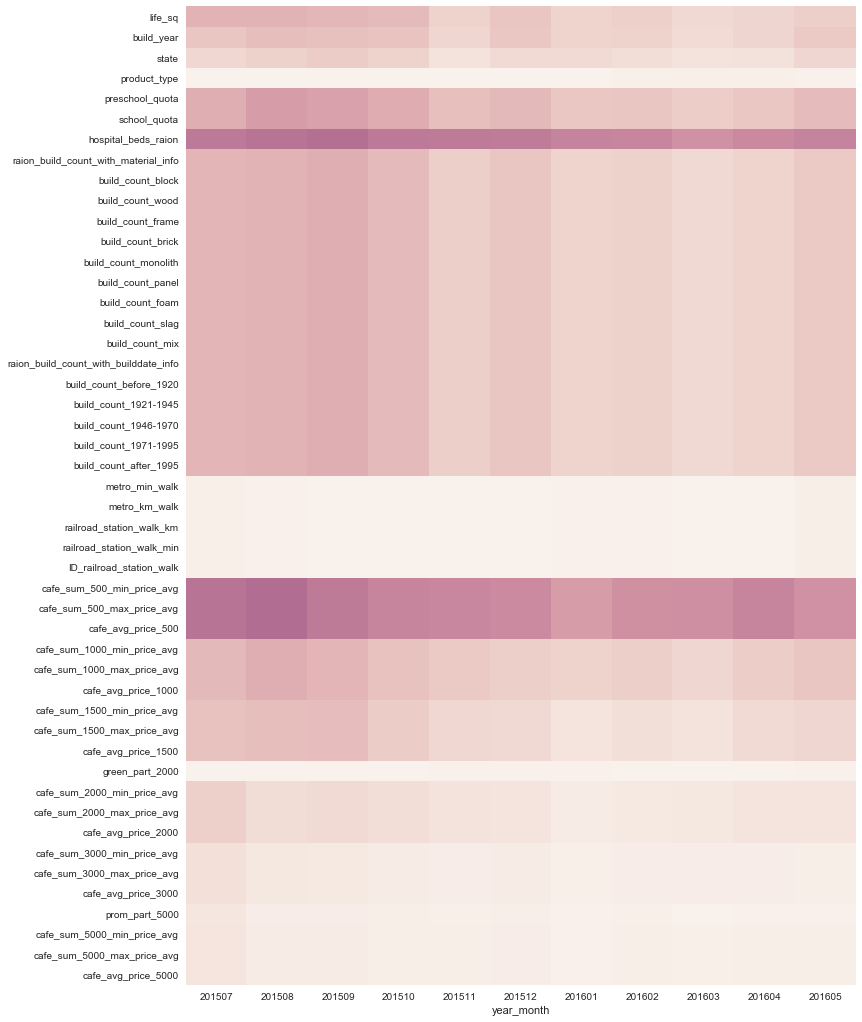

missing column num = 54


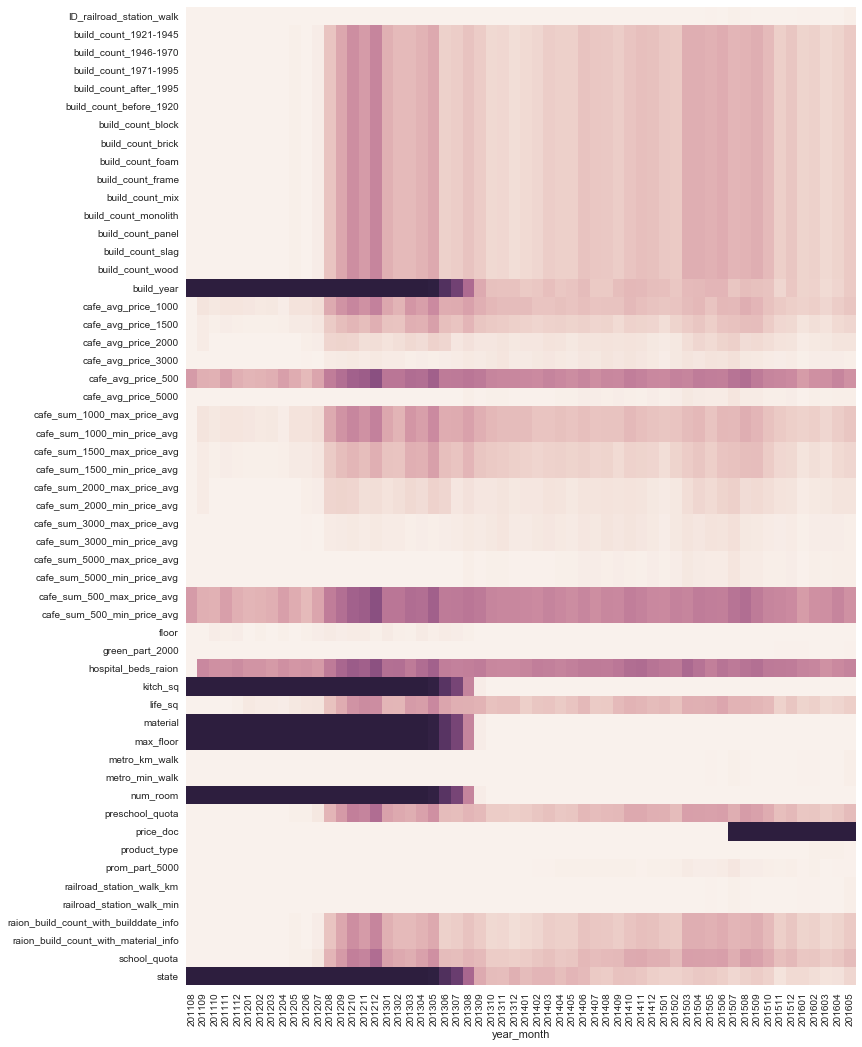

In [8]:
plot_missing_value(train)
plot_missing_value(test)
plot_missing_value(train_test)

In [9]:
train_test.state.value_counts()

2.0     8506
3.0     7703
1.0     7121
4.0      549
33.0       1
Name: state, dtype: int64

In [10]:
train_test.product_type.value_counts()

Investment       24446
OwnerOccupier    13654
Name: product_type, dtype: int64

### 交易记录的数量

In [11]:
print("train record num = {}".format(train.shape[0]))
print('test record num = {}'.format(test.shape[0]))
print('train_test record num = {}'.format(train_test.shape[0]))

train record num = 30471
test record num = 7662
train_test record num = 38133


### 每条记录是一笔交易，那么同一栋房屋会多次出现吧

In [12]:
id_features = [
    "full_sq",
    "life_sq",
    "floor",
    "max_floor",
    "build_year",
    "num_room",
    "kitch_sq",
    "sub_area"
]

train.drop_duplicates(subset=id_features).shape[0]

print("train unique record num = {}".format(train.drop_duplicates(subset=id_features).shape[0]))
print('test unique record num = {}'.format(test.drop_duplicates(subset=id_features).shape[0]))
print("train_test unique record num = {}".format(train_test.drop_duplicates(subset=id_features).shape[0]))

print(train_test[id_features].count())

dup = train_test.groupby(id_features).agg('size')
print("train unique record num = {}".format(train.groupby(id_features).agg('size').shape[0]))
print('test unique record num = {}'.format(test.groupby(id_features).agg('size').shape[0]))
print("train_test unique record num = {}".format(dup.shape[0]))
dup.value_counts()

print(dup.reset_index().count())

train unique record num = 28310
test unique record num = 7543
train_test unique record num = 35809
full_sq       38133
life_sq       30574
floor         37966
max_floor     28561
build_year    23479
num_room      28561
kitch_sq      28561
sub_area      38133
dtype: int64
train unique record num = 15728
test unique record num = 6169
train_test unique record num = 21893
full_sq       21893
life_sq       21893
floor         21893
max_floor     21893
build_year    21893
num_room      21893
kitch_sq      21893
sub_area      21893
0             21893
dtype: int64


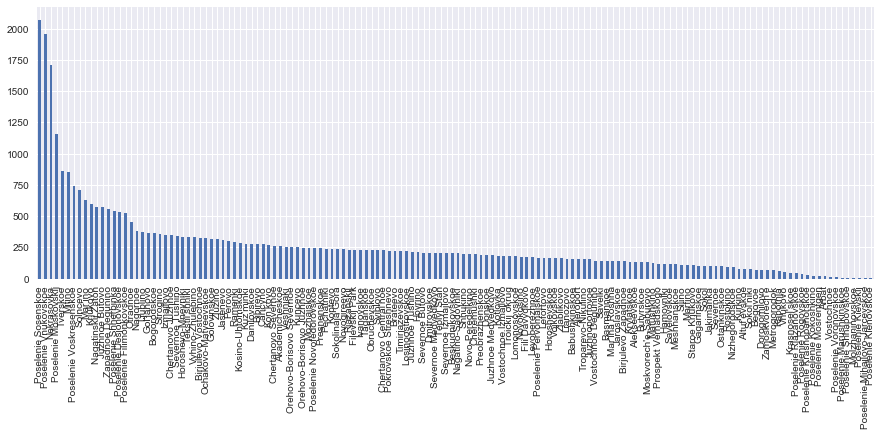

In [13]:
plt.figure(figsize=(15,5))
train_test.sub_area.value_counts().plot(kind='bar')
plt.show()

### train/test均为2011年8月-2015年6月

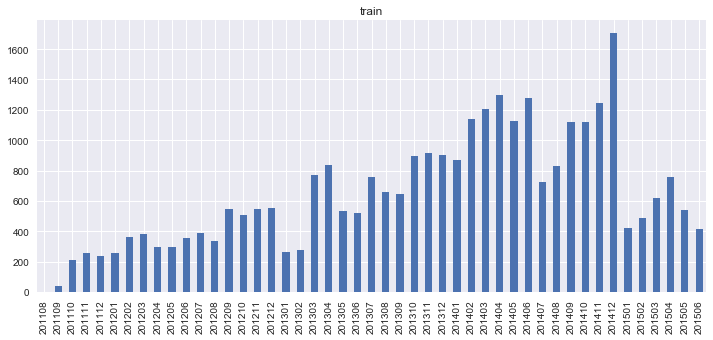

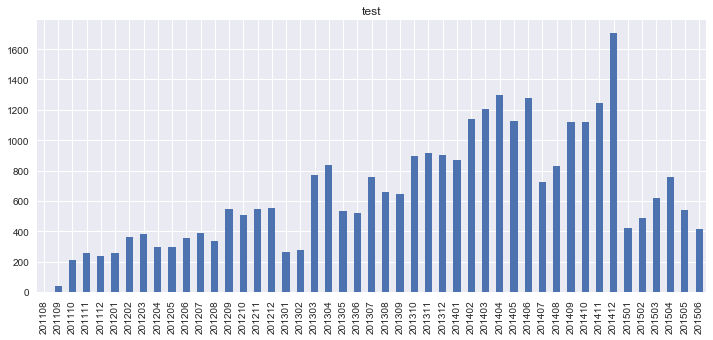

In [14]:
plt.figure(figsize=(12,5))
train.year_month.value_counts().sort_index().plot(kind='bar')
plt.title('train')
plt.show()
plt.figure(figsize=(12,5))
train.year_month.value_counts().sort_index().plot(kind='bar')
plt.title('test')
plt.show()

### train/test 中区域分布有区别
R语言画地图真厉害ggplot ggmap https://www.kaggle.com/jtremoureux/map-visualizations-with-external-shapefile

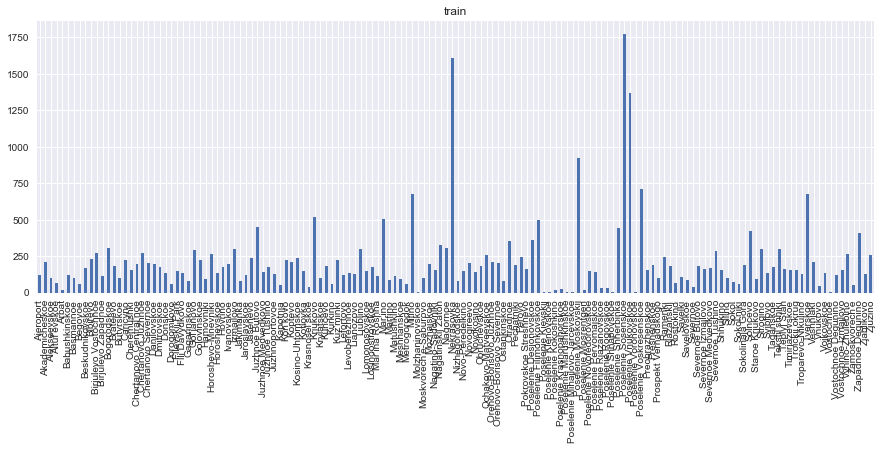

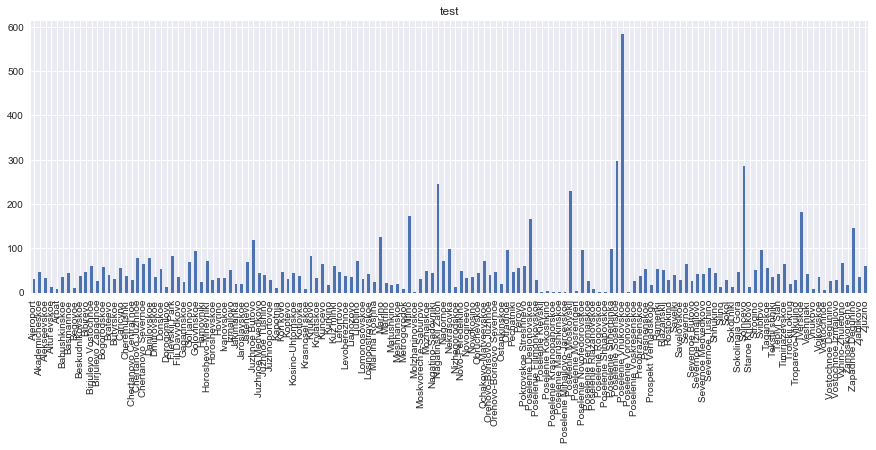

In [15]:
plt.figure(figsize=(15,5))
train.sub_area.value_counts().sort_index().plot(kind='bar')
plt.title('train')
plt.show()
plt.figure(figsize=(15,5))
test.sub_area.value_counts().sort_index().plot(kind='bar')
plt.title('test')
plt.show()

# 均价

In [59]:
train['price_sq'] = train.price_doc / (train.full_sq.apply(np.float64) + train.full_sq.mean())

## 最高楼层

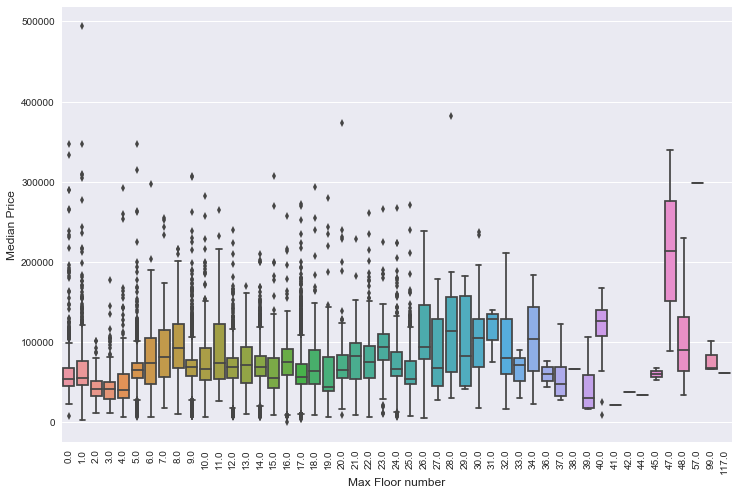

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x="max_floor", y="price_sq", data=train)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Max Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## 地区

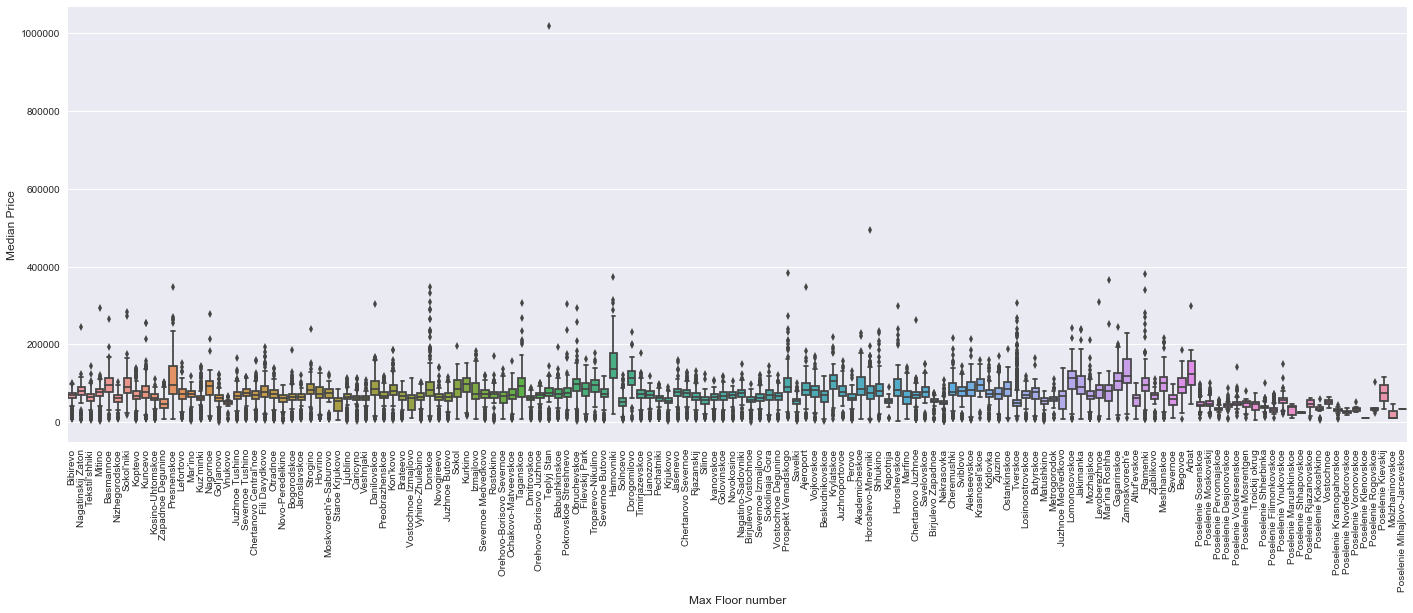

In [40]:
plt.figure(figsize=(24,8))
sns.boxplot(x="sub_area", y="price_sq", data=train)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Max Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## 建成时间

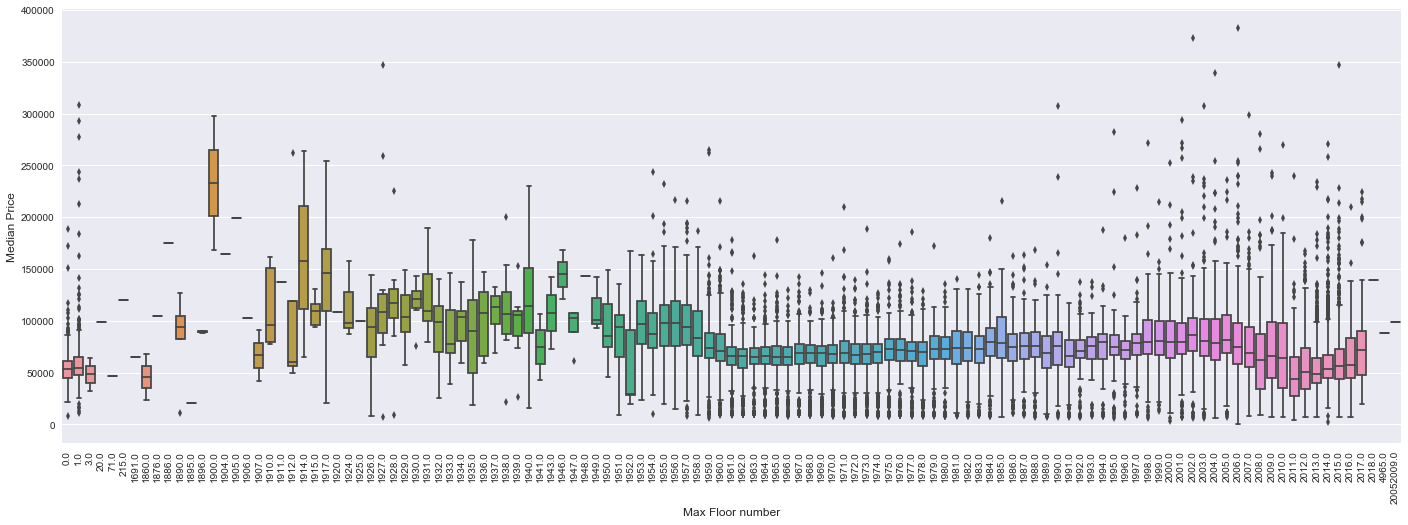

In [41]:
plt.figure(figsize=(24,8))
sns.boxplot(x="build_year", y="price_sq", data=train)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Max Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## 交易时间

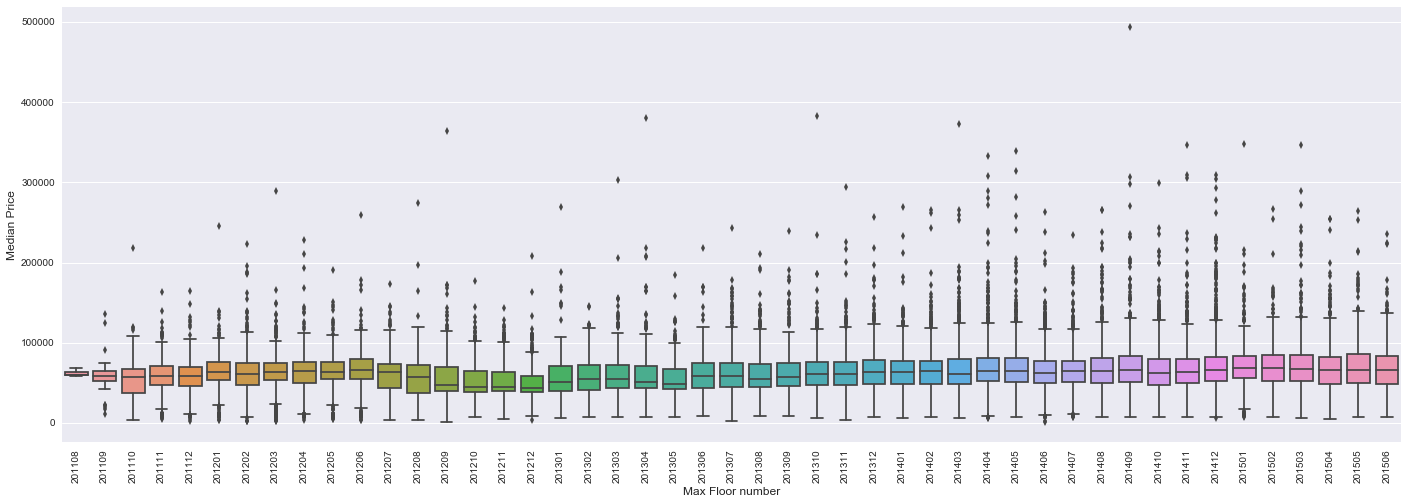

In [60]:
plt.figure(figsize=(24,8))
sns.boxplot(x="year_month", y="price_sq", data=train.loc[train.price_sq < 800000])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Max Floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## 交易量

### 每月 

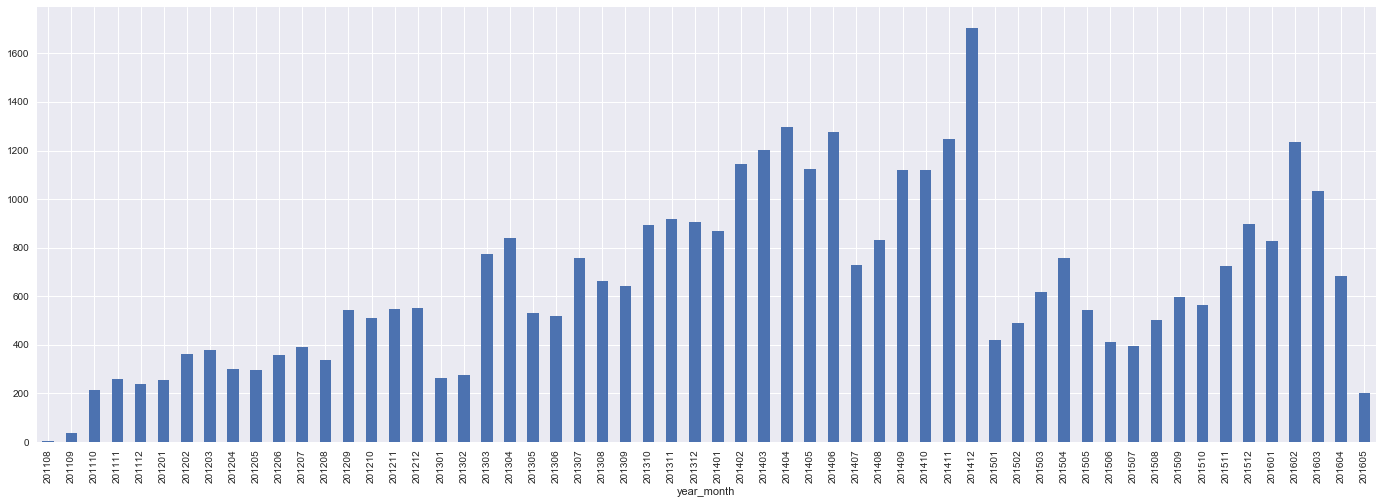

In [63]:
plt.figure(figsize=(24, 8))
train_test.groupby('year_month').agg('size').sort_index().plot(kind='bar')

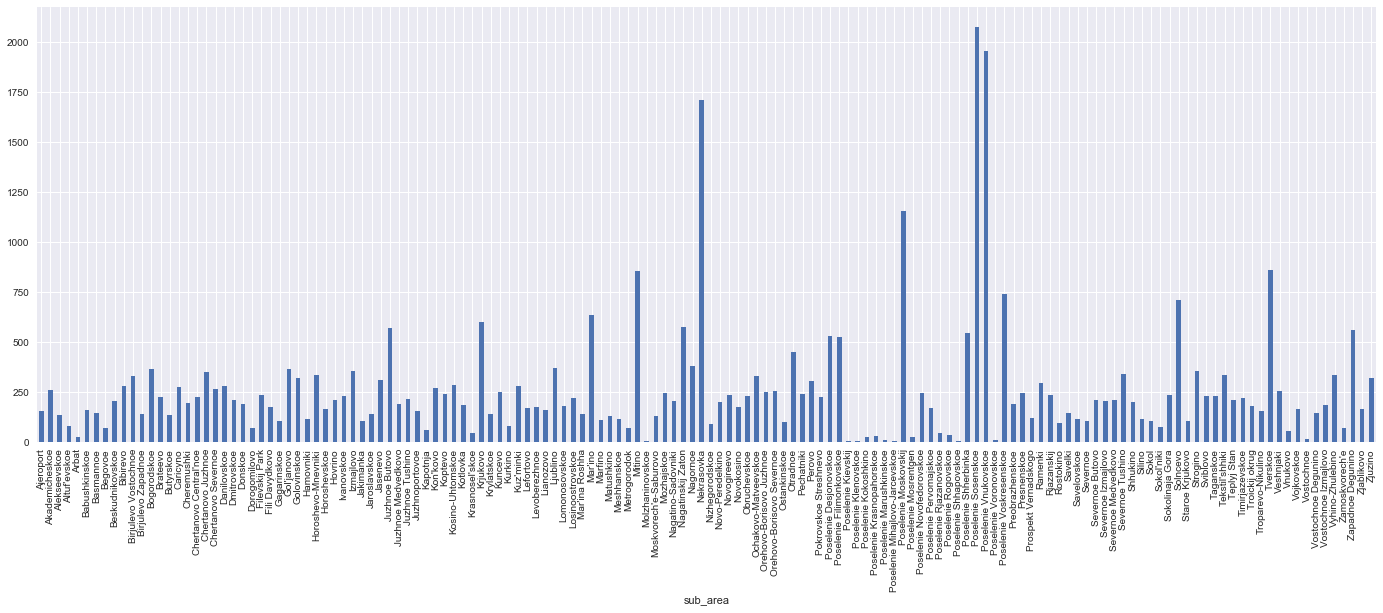

In [64]:
plt.figure(figsize=(24, 8))
train_test.groupby('sub_area').agg('size').sort_index().plot(kind='bar')

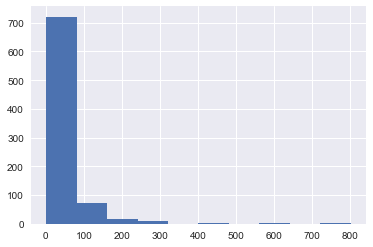

In [57]:
train_test.groupby(['year', 'sub_area']).agg('size').hist(bins=10)